In [1]:
import pickle

metadata = {
    'target_column': target_col,
    'numeric_columns': numeric_cols,
    'categorical_columns': categorical_cols,
    'total_instances': df.shape[0],
    'total_features': df.shape[1] - 1
}

with open('../data/processed/metadata.pkl', 'wb') as f:
    pickle.dump(metadata, f)

print("\n✅ Metadata disimpan untuk notebook berikutnya!")

NameError: name 'target_col' is not defined

In [ ]:
print("\n" + "="*80)
print("SUMMARY REPORT - EKSPLORASI DATA")
print("="*80)

summary = {
    'Total Instances': df.shape[0],
    'Total Features': df.shape[1] - 1,  # Exclude target
    'Target Variable': target_col,
    'Jumlah Kelas': df[target_col].nunique(),
    'Missing Values': 'Ada' if df.isnull().sum().sum() > 0 else 'Tidak Ada',
    'Duplikat': 'Ada' if df.duplicated().sum() > 0 else 'Tidak Ada',
    'Variabel Numerik': len(numeric_cols),
    'Variabel Kategorikal': len(categorical_cols),
    'Imbalance Ratio': f"{imbalance_ratio:.2f}:1"
}

print("\n📋 Ringkasan Dataset:")
for key, value in summary.items():
    print(f"  • {key}: {value}")


SUMMARY REPORT - EKSPLORASI DATA

📋 Ringkasan Dataset:
  • Total Instances: 145
  • Total Features: 32
  • Target Variable: GRADE
  • Jumlah Kelas: 8
  • Missing Values: Tidak Ada
  • Duplikat: Tidak Ada
  • Variabel Numerik: 32
  • Variabel Kategorikal: 1
  • Imbalance Ratio: 4.38:1


In [ ]:
print("\n" + "="*80)
print("ANALISIS IMBALANCED CLASSES")
print("="*80)

class_counts = df[target_col].value_counts()
max_count = class_counts.max()
min_count = class_counts.min()
imbalance_ratio = max_count / min_count

print(f"\nKelas terbanyak: {class_counts.idxmax()} ({max_count} instances)")
print(f"Kelas tersedikit: {class_counts.idxmin()} ({min_count} instances)")
print(f"Imbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 3:
    print("\n⚠️  Dataset SANGAT IMBALANCED!")
    print("💡 Pertimbangkan teknik: SMOTE, class weights, atau stratified sampling")
elif imbalance_ratio > 1.5:
    print("\n⚠️  Dataset cukup imbalanced")
    print("💡 Gunakan stratified split dan class weights")
else:
    print("\n✅ Dataset relatif balanced")


ANALISIS IMBALANCED CLASSES

Kelas terbanyak: 1 (35 instances)
Kelas tersedikit: 0 (8 instances)
Imbalance Ratio: 4.38:1

⚠️  Dataset SANGAT IMBALANCED!
💡 Pertimbangkan teknik: SMOTE, class weights, atau stratified sampling



ANALISIS KORELASI - VARIABEL NUMERIK


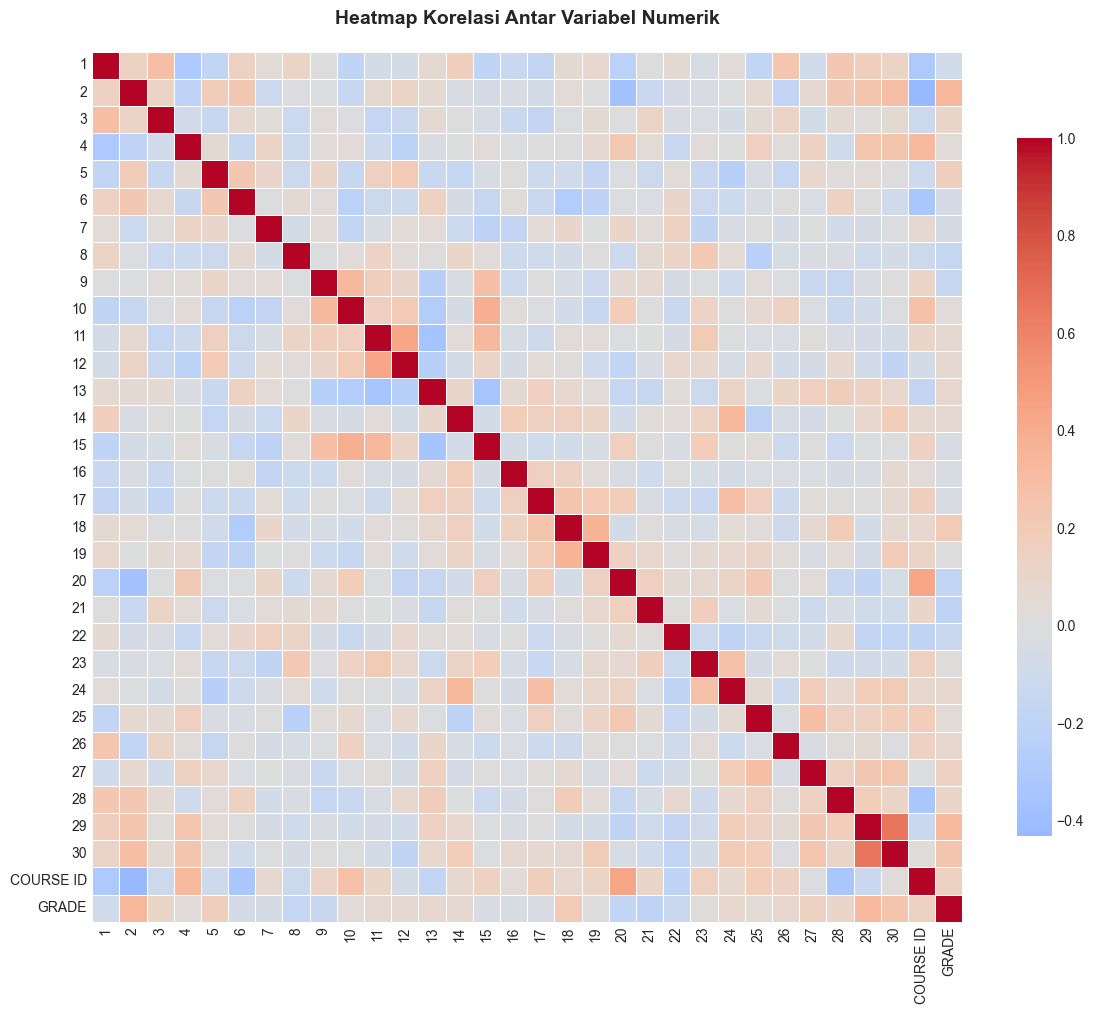


✅ Heatmap korelasi disimpan di: results/figures/distribution_plots/


In [ ]:
if len(numeric_cols) > 1:
    print("\n" + "="*80)
    print("ANALISIS KORELASI - VARIABEL NUMERIK")
    print("="*80)
    
    # Hitung korelasi
    correlation_matrix = df[numeric_cols].corr()
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', 
                center=0, square=True, linewidths=0.5,
                cbar_kws={"shrink": 0.8})
    plt.title('Heatmap Korelasi Antar Variabel Numerik', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('../results/figures/distribution_plots/correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✅ Heatmap korelasi disimpan di: results/figures/distribution_plots/")


In [ ]:
print("\n" + "="*80)
print("STATISTIK DESKRIPTIF - VARIABEL KATEGORIKAL")
print("="*80)

# Identifikasi kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nJumlah variabel kategorikal: {len(categorical_cols)}")

if len(categorical_cols) > 0:
    print("\nDaftar variabel kategorikal:")
    for i, col in enumerate(categorical_cols, 1):
        unique_vals = df[col].nunique()
        print(f"  {i}. {col}: {unique_vals} kategori unik")


STATISTIK DESKRIPTIF - VARIABEL KATEGORIKAL

Jumlah variabel kategorikal: 1

Daftar variabel kategorikal:
  1. STUDENT ID: 145 kategori unik


In [ ]:
print("\n" + "="*80)
print("STATISTIK DESKRIPTIF - VARIABEL NUMERIK")
print("="*80)

# Identifikasi kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nJumlah variabel numerik: {len(numeric_cols)}")

if len(numeric_cols) > 0:
    print("\nStatistik deskriptif:")
    print(df[numeric_cols].describe().round(2))


STATISTIK DESKRIPTIF - VARIABEL NUMERIK

Jumlah variabel numerik: 32

Statistik deskriptif:
            1       2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17      18      19      20      21      22      23      24      25      26      27      28      29      30  COURSE ID   GRADE
count  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00  145.00     145.00  145.00
mean     1.62    1.60    1.94    3.57    1.66    1.60    1.58    1.63    1.62    1.73    2.28    2.63    2.81    1.17    2.36    2.81    2.20    1.94    2.01    1.21    1.21    1.24    1.34    1.17    2.54    2.06    2.39    1.81    3.12    2.72       4.13    3.23
std      0.61    0.49    0.54    0.81    0.47    0.49    0.50    1.02    1.06    0.78    1.22    1.15    1.36   

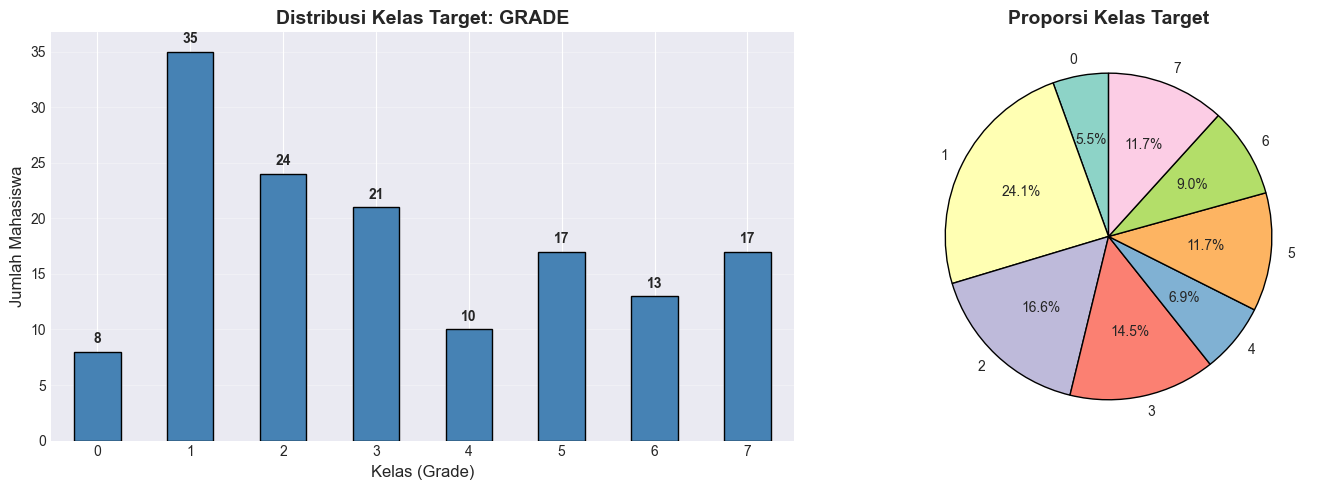


✅ Grafik distribusi target disimpan di: results/figures/distribution_plots/


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Count Plot
class_distribution.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title(f'Distribusi Kelas Target: {target_col}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Kelas (Grade)', fontsize=12)
axes[0].set_ylabel('Jumlah Mahasiswa', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Tambahkan nilai di atas bar
for i, v in enumerate(class_distribution.values):
    axes[0].text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# Plot 2: Pie Chart
colors = plt.cm.Set3(range(len(class_distribution)))
axes[1].pie(class_distribution.values, labels=class_distribution.index, 
            autopct='%1.1f%%', startangle=90, colors=colors,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1})
axes[1].set_title('Proporsi Kelas Target', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/distribution_plots/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Grafik distribusi target disimpan di: results/figures/distribution_plots/")

In [ ]:
print("\n" + "="*80)
print(f"DISTRIBUSI KELAS TARGET: {target_col}")
print("="*80)

class_distribution = df[target_col].value_counts().sort_index()
print("\nJumlah per kelas:")
print(class_distribution)

print("\nPersentase per kelas:")
class_percent = (df[target_col].value_counts(normalize=True) * 100).sort_index()
print(class_percent.round(2))


DISTRIBUSI KELAS TARGET: GRADE

Jumlah per kelas:
GRADE
0     8
1    35
2    24
3    21
4    10
5    17
6    13
7    17
Name: count, dtype: int64

Persentase per kelas:
GRADE
0     5.52
1    24.14
2    16.55
3    14.48
4     6.90
5    11.72
6     8.97
7    11.72
Name: proportion, dtype: float64


In [ ]:
print("\n" + "="*80)
print("IDENTIFIKASI VARIABEL TARGET")
print("="*80)

# Cari kolom yang kemungkinan adalah target (biasanya 'GRADE' atau 'OUTPUT')
possible_targets = [col for col in df.columns if 'GRADE' in col.upper() or 'OUTPUT' in col.upper()]

if possible_targets:
    target_col = possible_targets[0]
    print(f"\n✅ Kolom Target Teridentifikasi: '{target_col}'")
else:
    # Jika tidak ada, tampilkan semua kolom untuk dipilih manual
    print("\n⚠️  Kolom target tidak teridentifikasi otomatis.")
    print("Daftar semua kolom:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i}. {col}")
    target_col = df.columns[-1]  # Asumsikan kolom terakhir adalah target
    print(f"\n💡 Menggunakan kolom terakhir sebagai target: '{target_col}'")


IDENTIFIKASI VARIABEL TARGET

✅ Kolom Target Teridentifikasi: 'GRADE'


In [ ]:
print("\n" + "="*80)
print("ANALISIS DUPLIKASI DATA")
print("="*80)

duplicates = df.duplicated().sum()
print(f"\n📊 Jumlah baris duplikat: {duplicates}")

if duplicates > 0:
    print("⚠️  Dataset memiliki data duplikat yang perlu dihapus!")
else:
    print("✅ Tidak ada data duplikat!")


ANALISIS DUPLIKASI DATA

📊 Jumlah baris duplikat: 0
✅ Tidak ada data duplikat!


In [ ]:
print("\n" + "="*80)
print("ANALISIS MISSING VALUES")
print("="*80)

missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Kolom': missing_data.index,
    'Jumlah Missing': missing_data.values,
    'Persentase (%)': missing_percent.values
})

missing_df = missing_df[missing_df['Jumlah Missing'] > 0].sort_values(
    'Jumlah Missing', ascending=False
)

if len(missing_df) > 0:
    print("\n⚠️  KOLOM DENGAN MISSING VALUES:")
    print(missing_df.to_string(index=False))
else:
    print("\n✅ Tidak ada missing values dalam dataset!")


ANALISIS MISSING VALUES

✅ Tidak ada missing values dalam dataset!


In [ ]:
print("\n" + "="*80)
print("INFORMASI TIPE DATA DAN MISSING VALUES")
print("="*80)
df.info()


INFORMASI TIPE DATA DAN MISSING VALUES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19        

In [ ]:
print("="*80)
print("INFORMASI DATASET")
print("="*80)
print(f"\n📊 Jumlah Baris (Instances): {df.shape[0]}")
print(f"📊 Jumlah Kolom (Features): {df.shape[1]}")
print(f"\n{'='*80}\n")

# Tampilkan 5 baris pertama
print("5 BARIS PERTAMA DATASET:")
print(df.head())

INFORMASI DATASET

📊 Jumlah Baris (Instances): 145
📊 Jumlah Kolom (Features): 33


5 BARIS PERTAMA DATASET:
  STUDENT ID  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  COURSE ID  GRADE
0   STUDENT1  2  2  3  3  1  2  2  1  1   1   1   2   3   1   2   5   3   2   2   1   1   1   1   1   3   2   1   2   1   1          1      1
1   STUDENT2  2  2  3  3  1  2  2  1  1   1   2   3   2   1   2   1   2   2   2   1   1   1   1   1   3   2   3   2   2   3          1      1
2   STUDENT3  2  2  2  3  2  2  2  2  4   2   2   2   2   1   2   1   2   1   2   1   1   1   1   1   2   2   1   1   2   2          1      1
3   STUDENT4  1  1  1  3  1  2  1  2  1   2   1   2   5   1   2   1   3   1   2   1   1   1   1   2   3   2   2   1   3   2          1      1
4   STUDENT5  2  2  1  3  2  2  1  3  1   4   3   3   2   1   2   4   2   1   1   1   1   1   2   1   2   2   2   1   2   2          1      1


In [ ]:
file_path = '../data/raw/DATA (1).csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Dataset berhasil di-load!\n")
except FileNotFoundError:
    print("❌ File tidak ditemukan!")
    print("Pastikan file 'DATA (1).csv' ada di folder: data/raw/")
    print("Atau sesuaikan path di variabel 'file_path'")

✅ Dataset berhasil di-load!



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Untuk visualisasi yang lebih baik
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

print("✅ Libraries berhasil di-import!")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

✅ Libraries berhasil di-import!
Pandas version: 2.3.3
Numpy version: 2.3.4
